# Tutorial notebook

This notebook is to demonstrate the function of modules and how they work together.

### Step 1: argument file reader

In [1]:
# read local file into data frame
from orangecontrib.argument.miner.reader import read_json_file, validate

fpath = "../example/data/data_processed_1prod_full.json"

df_arguments = read_json_file(fpath)
df_arguments

,reviewText,overall,vote
0,I always get a half size up in my tennis shoes...,3,7.0
1,Put them on and walked 3 hours with no problem...,5,NaN
2,excelente,5,NaN
3,The shoes fit well in the arch area. They are ...,4,NaN
4,Tried them on in a store before buying online ...,5,22.0
...,...,...,...
366,Favorite Nike shoe ever! The flex sole is exce...,5,NaN
367,"I wear these everyday to work, the gym, etc.",5,NaN
368,"Love these shoes! Great fit, very light weight.",5,NaN
369,Super comfortable and fit my small feet perfec...,5,NaN


In [2]:
# select desired columns and validate data
df_arguments = df_arguments[["reviewText", "overall"]]
df_arguments = validate(df_arguments)
df_arguments

,argument,score
0,I always get a half size up in my tennis shoes...,3
1,Put them on and walked 3 hours with no problem...,5
2,excelente,5
3,The shoes fit well in the arch area. They are ...,4
4,Tried them on in a store before buying online ...,5
...,...,...
366,Favorite Nike shoe ever! The flex sole is exce...,5
367,"I wear these everyday to work, the gym, etc.",5
368,"Love these shoes! Great fit, very light weight.",5
369,Super comfortable and fit my small feet perfec...,5


### Step 2: argument chunking


In [3]:
from orangecontrib.argument.miner.chunker import ArgumentChunker

chunker = ArgumentChunker(df_arguments["argument"])
df_chunks = chunker.get_chunk_table()
df_topics = chunker.get_topic_table()

/Volumes/Databank/Workspace/orange3-argument/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Volumes/Databank/Workspace/orange3-argument/venv/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Volumes/Databank/Workspace/orange3-argument/venv/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value fo

In [4]:
df_chunks

,argument_id,chunk,topic,rank,polarity_score
0,0,I always get a half size up in my tennis shoes .,2,0.500000,-0.166667
1,0,For some reason these feel to big in the heel ...,5,0.500000,-0.050000
2,1,walked 3 hours with no problem,20,0.249916,0.000000
3,1,Put them on and !,20,0.255889,0.000000
4,1,Love them !,1,0.240049,0.625000
...,...,...,...,...,...
1193,369,I can wear the shoe all day long and,20,0.125183,-0.050000
1194,369,they are easy to clean compared to other shoes...,11,0.126277,0.225000
1195,369,They are light colored so any dirt will be see...,19,0.126515,0.342857
1196,369,Would definitely buy another pair in a differe...,17,0.124527,0.000000


In [5]:
df_topics

,topic,count,name,keywords,keyword_scores
0,-1,29,-1_excelente_hate_reviewers_restrict,"[excelente, hate, reviewers, restrict, happene...","[1.0283922081911838, 0.8416426678749228, 0.841..."
1,0,114,0_true_fits_expected_fit,"[true, fits, expected, fit, glove, perfect, qu...","[0.4707247757737208, 0.4682254424638869, 0.438..."
2,1,78,1_favorite_turned_liked_absolute,"[favorite, turned, liked, absolute, love, easy...","[0.625009619811193, 0.5975928835673462, 0.5726..."
3,2,74,2_half_ordered_size_order,"[half, ordered, size, order, large, smaller, w...","[0.4651007000924715, 0.4471144737549425, 0.411..."
4,3,57,3_attractive_bad_allow_people,"[attractive, bad, allow, people, stylish, cool...","[0.5061549298425696, 0.45488447661048714, 0.45..."
5,4,42,4_purchase_satisfied_pleased_shipping,"[purchase, satisfied, pleased, shipping, produ...","[0.8141209020116295, 0.8084378880782601, 0.700..."
6,5,70,5_narrow_wide_wider_longer,"[narrow, wide, wider, longer, big, hard, snug,...","[0.43090857210566597, 0.402864634812877, 0.386..."
7,6,43,6_hurt_pain_problems_hip,"[hurt, pain, problems, hip, discomfort, weird,...","[0.573405052840142, 0.5537924036592503, 0.4795..."
8,7,45,7_lightweight_minimalist_held_paper,"[lightweight, minimalist, held, paper, light, ...","[0.5746772046999118, 0.5680270584631272, 0.568..."
9,8,52,8_cardio_dance_everyday_class,"[cardio, dance, everyday, class, zumba, concre...","[0.46709818725382596, 0.4359799750909897, 0.41..."


### Step 3: argument processing

In [6]:
from orangecontrib.argument.miner.processor import ArgumentProcessor

processor = ArgumentProcessor(df_arguments)
df_arguments = processor.get_argument_table(df_chunks)
df_arguments

,argument,score,readability,topics,sentiment,coherence
0,I always get a half size up in my tennis shoes...,3,92.430000,"[2, 5]",0.554167,21.818182
1,Put them on and walked 3 hours with no problem...,5,105.880000,"[20, 20, 1, 7]",0.374155,1.597841
2,excelente,5,-47.980000,[-1],0.500000,2.000000
3,The shoes fit well in the arch area. They are ...,4,92.171196,"[21, 5, 5, 16]",0.475081,3.077695
4,Tried them on in a store before buying online ...,5,77.864895,"[13, 11, 3, 6, 4]",0.287419,1.403350
...,...,...,...,...,...,...
366,Favorite Nike shoe ever! The flex sole is exce...,5,72.164020,"[1, 14, 5, 6, 18, 0, 12, 23]",0.402444,1.673484
367,"I wear these everyday to work, the gym, etc.",5,94.300000,[8],0.600000,2.500000
368,"Love these shoes! Great fit, very light weight.",5,107.600000,"[22, 0]",0.200417,1.250651
369,Super comfortable and fit my small feet perfec...,5,73.544000,"[0, 9, 19, 3, 20, 11, 19, 17]",0.403452,1.676312


array([[<Axes: title={'center': 'readability'}>,
        <Axes: title={'center': 'sentiment'}>],
       [<Axes: title={'center': 'coherence'}>, <Axes: >]], dtype=object)

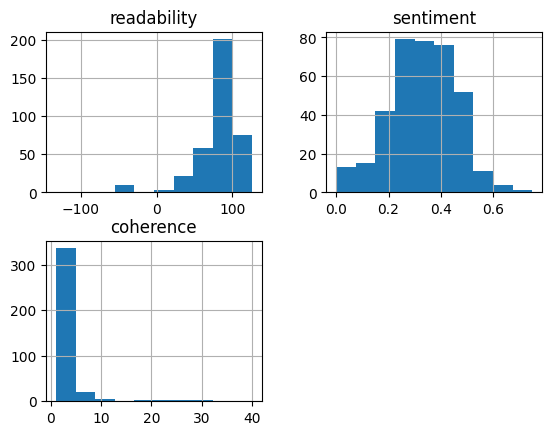

In [7]:
# plots for showing distribution of measures
df_arguments[["readability", "sentiment", "coherence"]].hist()

### Step 4: argument mining

In [9]:
from orangecontrib.argument.miner.miner import ArgumentMiner

miner = ArgumentMiner(df_arguments)
df_nodes = miner.select_by_topic(26)
df_edges = miner.get_edge_table(df_nodes)
df_nodes = miner.get_node_table(df_edges, df_nodes)

In [17]:
df_edges.sort_values(by=["target", "source"])

,weight,source,target
0,1.020600,47,27
1,7.687267,62,27
3,3.579898,70,27
4,0.983452,78,27
5,14.797053,128,27
7,3.757521,291,27
8,6.666667,62,47
10,2.559298,70,47
12,13.776453,128,47
14,2.736921,291,47


In [19]:
df_nodes.sort_values(by="label")

,argument,score,readability,topics,sentiment,coherence,argument_id,label
0,It looks a bit nicer on the picture. Its very ...,4,80.880030,"[26, 7, 3, 11]",0.367611,2.312733,27,defeated
1,"I wore these shoe one time, from the airport i...",1,78.457948,"[25, -1, 26, 24, 24]",0.500000,3.333333,47,defeated
3,"Super light-weight, decent arch support (mine ...",5,65.562910,"[21, 10, 10, 5, 7, 26, 23]",0.430310,1.755341,64,defeated
5,I usually wear a size 8 and they fit fine. The...,1,106.065714,"[0, 2, 5, 26, 5, 4]",0.503381,3.296185,78,defeated
6,Shoe was somewhat large,4,97.025000,[26],0.392857,2.456140,87,defeated
8,It's hard to find a lightweight athletic shoe ...,5,89.085402,"[5, 26, 8, 15, 18, -1]",0.515523,2.064083,219,defeated
10,I liked these shoes a lot. Very light weight. ...,4,91.950000,"[1, 7, 26, 9]",0.256860,1.841146,309,defeated
11,The picture makes the shoe look like it has a ...,4,74.700584,"[26, 5, 5, 26, 5, 0, 20]",0.432388,2.720257,344,defeated
2,"On the left shoe, there were two stained yello...",3,95.165000,[26],0.500000,10.000000,62,supportive
4,These are a bit longer than they should be. I ...,3,86.600325,"[5, 2, 2, 0, 12, 12, 12, 26, 26, 26, 26, 12, 1...",0.430297,5.892632,70,supportive
